### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

### Data Exploration

In [2]:
df = pd.read_csv('data_car.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Make : 48
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64

********************

Model : 915
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: Model, dtype: int64

********************

Year : 28
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: Year, dtype: int64

********************

Engine Fuel Type : 10
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: Engine Fuel Type, dtype: int64

********************

Engine HP : 356
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
Name: Engine HP, dtype: int64

********************

Engine Cylinders : 9
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
Name: Engine Cylinders, dtype: int64

### Cleaning Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [9]:
df.rename(columns = {'msrp': 'price'}, inplace = True)

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploreing Data

In [11]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [12]:
df.describe(include=['O'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


### Target variable analysis (price)

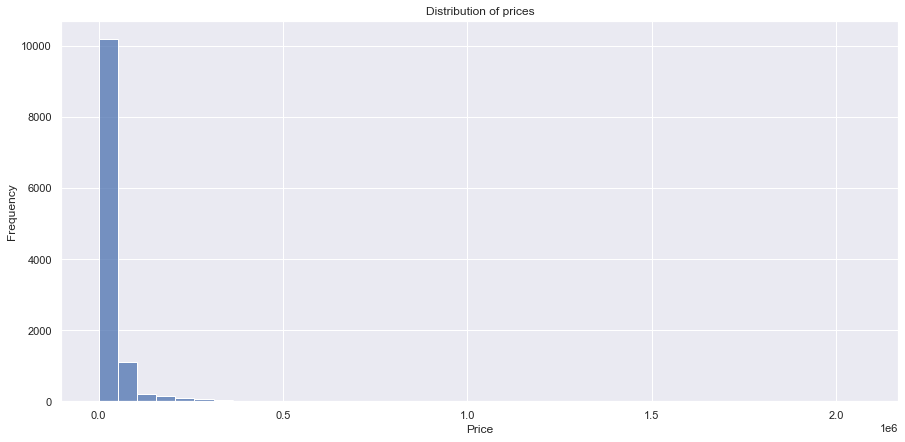

In [13]:
plt.figure(figsize=(15, 7))
sns.histplot(df.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

This is a long tail distribution, which is a typical situation for many items with low prices and very few expensive ones.

We can have a closer look by zooming in a bit and looking at values below $100,000

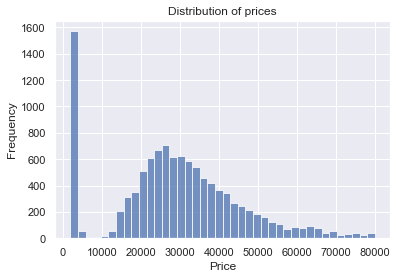

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 80000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough.

One way to solve this problem is log transformation. 

### Log Transformation

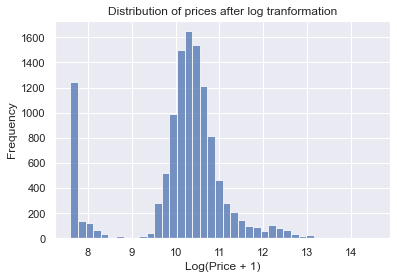

In [15]:
df['log_price'] = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(df.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()


The effect of the long tail is removed, and we can see the entire distribution in one plot.

The +1 part is important in cases that have zeros. The logarithm of zero is minus infinity, but the logarithm of one is zero.

For our specific case, zero values are not an issue—all the prices we have start at $2,000—but it’s still a convention that we follow.

In [16]:
df.price.skew()

11.771987129334972

In [17]:
df.log_price.skew()

-0.9178678067039072

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

In [19]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

### What's the average price of BMW cars in the dataset?

In [20]:
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [21]:
df.groupby('make').mean()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
make,,,,,,,,,
acura,"2,010.06",244.80,5.33,3.62,28.11,19.94,204.00,"34,887.59",10.14
alfa_romeo,"2,015.40",237.00,4.00,2.00,34.00,24.00,113.00,"61,600.00",11.02
aston_martin,"2,013.02",484.32,10.62,2.15,18.89,12.53,259.00,"197,910.38",12.14
audi,"2,012.23",277.70,5.56,3.47,28.82,19.59,"3,105.00","53,452.11",10.48
bentley,"2,011.70",533.85,9.73,2.68,18.91,11.55,520.00,"247,169.32",12.40
bmw,"2,014.35",326.91,5.96,3.16,29.25,20.74,"3,916.00","61,546.76",10.91
bugatti,"2,008.33","1,001.00",16.00,2.00,14.00,8.00,820.00,"1,757,223.67",14.37
buick,"2,010.01",219.24,5.32,3.84,26.95,18.70,155.00,"28,206.61",9.96
cadillac,"2,013.15",332.31,6.43,3.60,25.24,17.36,"1,624.00","56,231.32",10.81


In [22]:
df.groupby('make').mean()['price']['bmw']

61546.76347305389

### Compare the average price for cars before / after year 2015

In [23]:
df[df['year'] >= 2015]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
32,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,27495,10.22
33,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,24995,10.13
34,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,28195,10.25
41,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,35,23,3916,32850,10.40
42,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,luxury,compact,convertible,34,23,3916,38650,10.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,bmw,z4,2015,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,56950,10.95
11899,bmw,z4,2015,premium_unleaded_(required),335.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,65800,11.09
11900,bmw,z4,2016,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,57500,10.96
11901,bmw,z4,2016,premium_unleaded_(required),240.00,4.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,34,22,3916,49700,10.81


In [24]:
df.price.mean()

40594.737032063116

In [25]:
df[df['year'] >= 2015]['price'].mean()

45667.156463719766

In [26]:
df[df['year'] < 2015]['price'].mean()

35457.18770062511

In [27]:
np.random.seed(2)     # Fixes the random seed to make sure that the results are reproducible

n = len(df) 

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print('No. of rows for training : ', n_train)
print('No. of rows for validation : ', n_val)
print('No. of rows for testing : ', n_test)

No. of rows for training :  7150
No. of rows for validation :  2382
No. of rows for testing :  2382


In [28]:
idx = np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 11911 11912 11913]
[2735 6720 5878 ... 6637 2575 7336]


In [29]:
df_shuffled = df.iloc[idx]
print(df.index)
print(df_shuffled.index)

RangeIndex(start=0, stop=11914, step=1)
Int64Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,
             4459,
            ...
             6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,
             7336],
           dtype='int64', length=11914)


In [30]:
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
2735,chevrolet,cobalt,2008,regular_unleaded,148.00,4.00,manual,front_wheel_drive,2.00,NaN,compact,coupe,33,24,1385,14410,9.58
6720,toyota,matrix,2012,regular_unleaded,132.00,4.00,automatic,front_wheel_drive,4.00,hatchback,compact,4dr_hatchback,32,25,2031,19685,9.89
5878,subaru,impreza,2016,regular_unleaded,148.00,4.00,automatic,all_wheel_drive,4.00,hatchback,compact,4dr_hatchback,37,28,640,19795,9.89
11190,volkswagen,vanagon,1991,regular_unleaded,90.00,4.00,manual,rear_wheel_drive,3.00,NaN,large,passenger_minivan,18,16,873,2000,7.60
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.00,8.00,automatic,four_wheel_drive,4.00,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,10.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.00,6.00,automatic,rear_wheel_drive,3.00,NaN,midsize,cargo_van,18,13,1385,2052,7.63
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.00,4.00,automatic,all_wheel_drive,4.00,"crossover,hybrid",compact,4dr_suv,33,29,640,25995,10.17
6637,dodge,magnum,2006,regular_unleaded,250.00,6.00,automatic,all_wheel_drive,4.00,NaN,large,wagon,22,15,1851,29100,10.28
2575,honda,civic,2016,regular_unleaded,174.00,4.00,automatic,front_wheel_drive,4.00,NaN,midsize,sedan,42,31,2202,22200,10.01


In [31]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [32]:
df_train.shape


(7150, 17)

In [33]:
df_val.shape

(2382, 17)

In [34]:
df_test.shape

(2382, 17)

In [35]:
y_train = df_train.log_price.values
y_val = df_val.log_price.values
y_test = df_test.log_price.values

### Baseline solution

In [41]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] 

In [42]:
df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.00,6.00,26,19,3916
1,300.00,6.00,28,19,3916
2,300.00,6.00,28,20,3916
3,230.00,6.00,28,18,3916
4,230.00,6.00,28,18,3916
...,...,...,...,...,...
11909,300.00,6.00,23,16,204
11910,300.00,6.00,23,16,204
11911,300.00,6.00,23,16,204
11912,300.00,6.00,23,16,204


In [43]:
df[base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [44]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

## Linear Regression

In [36]:
df_train.corr()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
year,1.00,0.36,-0.04,0.26,0.25,0.20,0.08,0.22,0.77
engine_hp,0.36,1.00,0.78,-0.10,-0.39,-0.44,0.04,0.65,0.68
engine_cylinders,-0.04,0.78,1.00,-0.14,-0.60,-0.60,0.04,0.51,0.35
number_of_doors,0.26,-0.10,-0.14,1.00,0.11,0.12,-0.05,-0.12,0.11
highway_mpg,0.25,-0.39,-0.60,0.11,1.00,0.86,-0.02,-0.15,-0.01
city_mpg,0.20,-0.44,-0.60,0.12,0.86,1.00,0.00,-0.15,-0.03
popularity,0.08,0.04,0.04,-0.05,-0.02,0.00,1.00,-0.04,0.01
price,0.22,0.65,0.51,-0.12,-0.15,-0.15,-0.04,1.00,0.58
log_price,0.77,0.68,0.35,0.11,-0.01,-0.03,0.01,0.58,1.00


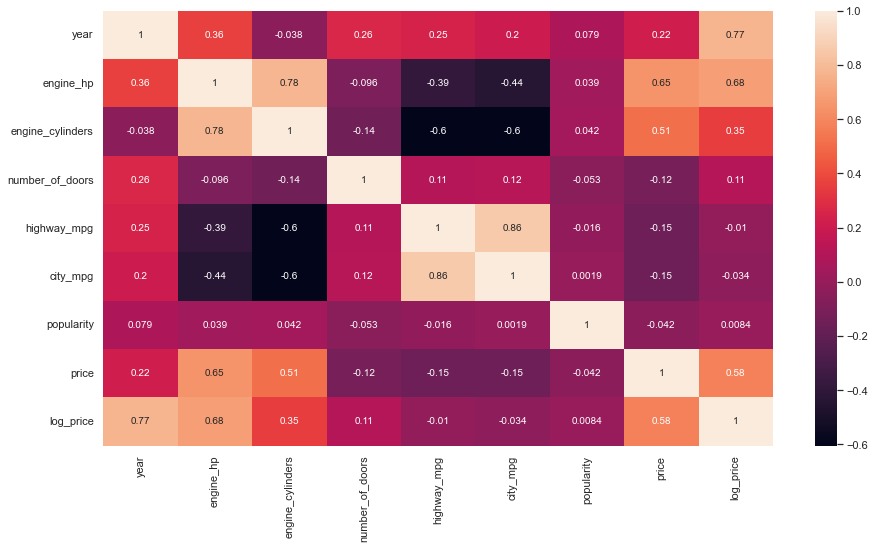

In [37]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df_train.corr(), annot = True)

In [38]:
def linear_regression(xi):
    n =len(xi)                # Number of features used
    
    pred = w0                 # Initial / Base prediction
    
    for j in range(n):
        pred += w[j]*xi[j]     # Formula = w0 +sigma[0:n-1]{w[j]*xi[j]}
    
    return pred

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [45]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

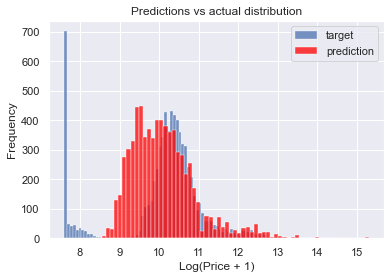

In [46]:
sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction', color='red')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Model Evaluation

In [47]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [48]:
rmse(y_train, y_pred)

0.7574439819012008

In [49]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [50]:
rmse(y_val, y_pred)

0.750250234638192

## Simple Feature Engineering

To improve our model, we can create other features and add them to the existing features. This process is called feature engineering.

    Our aim is to `improve the RMSE ` calculated on the validation data.

In [51]:
sorted(df.year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [52]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year    # Because the dataset was created in 2017 (which we can verify by checking df_train.year.max())
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [53]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('Train RMSE: ', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE: ', rmse(y_val, y_pred))

Train RMSE:  0.5117454503079418
Validation RMSE:  0.507003390601304


Adding “age” was quite helpful for the model

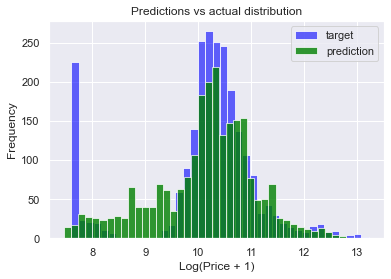

In [54]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='green', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Handling Categorical Variables

In [55]:
df.number_of_doors.value_counts()

4.00    8353
2.00    3160
3.00     395
Name: number_of_doors, dtype: int64

In [56]:
df['make'].value_counts().head(10)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: make, dtype: int64

In [57]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [58]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5010764007201611
validation: 0.4982643557277054


In [59]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [60]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [61]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.47482567372246


In [62]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [63]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [64]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [65]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [66]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [70]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [71]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 125.38881143044857
validation: 75.53086183063046


In [72]:
w.astype(int)

array([    0,     0,     3,     9,     0,     4,  3364,  3387,  3351,
           1,    46,   -30,   -10,    19,   -63,   -87,   -69,   -67,
         977,   977,  1072, -2514, -2457, -2468, -2436,    20,     1,
         -18,   -12,   -11,   -44,    22,     7,     0,     0,     0,
           0,     0])

## Regularization

In [73]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [74]:
X_train = prepare_X(df_train)

In [75]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -2196.91, 19.18, -2514.23
0.001, 6.96, -0.10, 1.76
 0.01, 6.95, -0.10, 1.76
  0.1, 6.82, -0.10, 1.73
    1, 6.04, -0.10, 1.52
   10, 4.32, -0.09, 1.07


In [76]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 125.38881143044857
val 75.53086183063046


In [77]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46234354619596807
val 0.45751588641454244


In [78]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.45750289121215676
0.0001 0.457503317657973
 0.001 0.45750445525095257
  0.01 0.45751588641454244
   0.1 0.45763258277263474
     1 0.45890469947628415
     5 0.46450155470596705
    10 0.4707849371630431


In [79]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.45751588641454244
test: 0.45460022119092663


## Using the model

In [80]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'price': 31120,
 'log_price': 10.345638111452145}

In [81]:
X_test = prepare_X(pd.DataFrame([ad]))
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([28468.7567645])